# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [201]:
import numpy as np
import pandas as pd

In [202]:
pdf = pd.read_csv('petrol.csv')

In [203]:
pdf.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [204]:
pdf.columns

Index(['tax', ' income', ' highway', ' dl', ' consumption'], dtype='object')

# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [205]:
Q1 = pdf.quantile(0.25)
Q3 = pdf.quantile(0.75)
IQR = Q3 - Q1

In [206]:
df = pdf[~((pdf < (Q1 - 1.5 * IQR)) |(pdf > (Q3 + 1.5 * IQR))).any(axis=1)]

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [207]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Sia\Anaconda2\envs\Python3.6\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


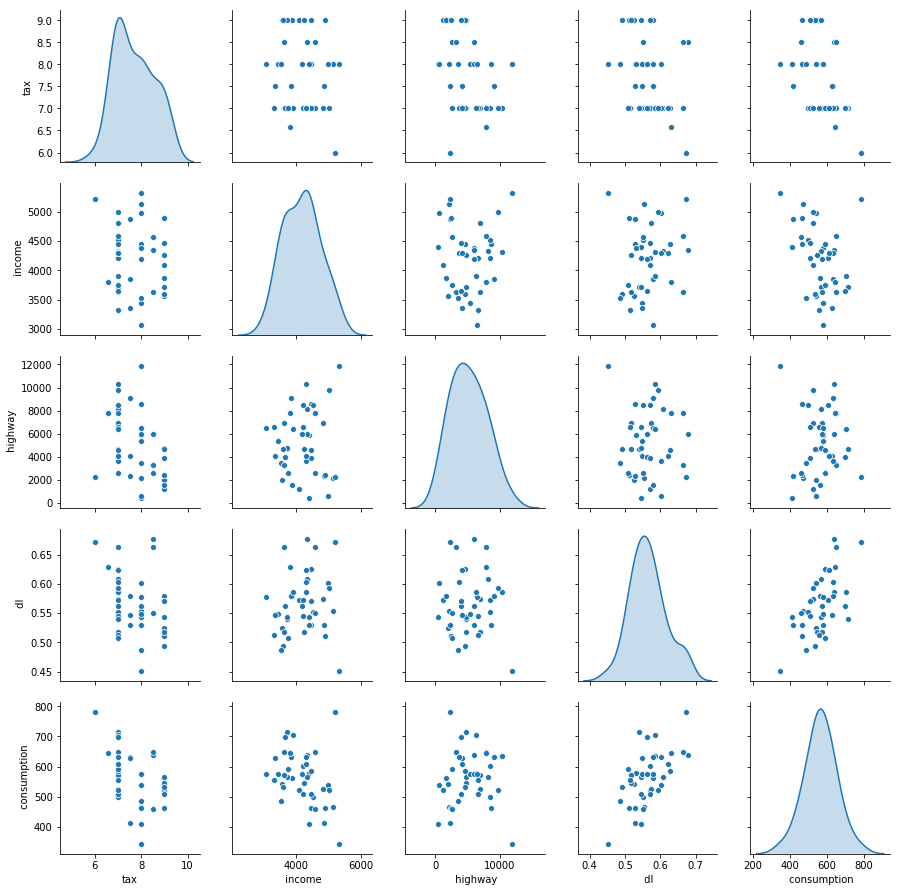

In [208]:
sns.pairplot( df , diag_kind='kde')

In [209]:
df['tax'].corr(df[' consumption'])

-0.4461157362582568

In [210]:
df[' income'].corr(df[' consumption'])

-0.3473255886805976

In [211]:
df[' highway'].corr(df[' consumption'])

0.0343088502886391

In [212]:
df[' dl'].corr(df[' consumption'])

0.6117880063947397

dl attribute (number of drivers) seems to have stronger relationship with consumtion

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

Considering single parameter. 

In [237]:
X_tax = df[['tax']]
X_inc = df[[' income']]
X_high = df[[' highway']]
X_dl = df[[' dl']]
X_multi = df[['tax',' income',' highway', ' dl']]
Y = df[[' consumption']]

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [214]:
from sklearn.model_selection import train_test_split

In [248]:
x_tax_train, x_tax_test, y_tax_train, y_tax_test = train_test_split(X_tax,Y, test_size=0.2, train_size = 0.2, random_state = 1)
x_inc_train, x_inc_test, y_inc_train, y_inc_test = train_test_split(X_inc,Y, test_size=0.2, train_size = 0.2, random_state = 1)
x_high_train, x_high_test, y_high_train, y_high_test = train_test_split(X_high,Y, test_size=0.2, train_size = 0.2, random_state = 1)
x_dl_train, x_dl_test, y_dl_train, y_dl_test = train_test_split(X_dl,Y, test_size=0.2, train_size = 0.2, random_state = 1)

x_multi_train, x_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, Y, test_size = 0.2, train_size = 0.2, random_state = 1)

In [249]:
print(x_tax_train.shape, y_tax_train.shape,x_tax_test.shape, y_tax_test.shape)
print(x_inc_train.shape, y_inc_train.shape,x_inc_test.shape, y_inc_test.shape)
print(x_high_train.shape, y_high_train.shape,x_high_test.shape, y_high_test.shape)
print(x_dl_train.shape, y_dl_train.shape,x_dl_test.shape, y_dl_test.shape)

print(x_multi_train.shape, y_multi_train.shape,x_multi_test.shape, y_multi_test.shape)

(8, 1) (8, 1) (9, 1) (9, 1)
(8, 1) (8, 1) (9, 1) (9, 1)
(8, 1) (8, 1) (9, 1) (9, 1)
(8, 1) (8, 1) (9, 1) (9, 1)
(8, 4) (8, 1) (9, 4) (9, 1)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [217]:
from sklearn.linear_model import LinearRegression

In [244]:
model_tax = LinearRegression()
model_inc = LinearRegression()
model_high = LinearRegression()
model_dl  = LinearRegression()
model_multi = LinearRegression()

In [253]:
model_tax.fit(x_tax_train, y_tax_train)
model_inc.fit(x_inc_train, y_inc_train)
model_high.fit(x_high_train, y_high_train)
model_dl.fit(x_dl_train, y_dl_train)

model_multi.fit(x_multi_train, y_multi_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [254]:
coef_tax = model_tax.coef_
coef_inc = model_inc.coef_
coef_high = model_high.coef_
coef_dl = model_dl.coef_

In [255]:
data_inp = pd.DataFrame()

In [256]:
data_inp['coef'] = [coef_tax.item(0,0), coef_inc.item(0,0), coef_high.item(0,0), coef_dl.item(0,0)]

In [257]:
data_inp

,coef
0,-94.250000
1,0.019153
2,0.014466
3,1427.772770


In [258]:
X_multi.columns

Index(['tax', ' income', ' highway', ' dl'], dtype='object')

In [259]:
data_inp['Input'] = X_multi.columns

In [260]:
data_inp

,coef,Input
0,-94.250000,tax
1,0.019153,income
2,0.014466,highway
3,1427.772770,dl


Considering the multi regression model, below are the coeficient and X columns relation

In [261]:
data_multi_inp = pd.DataFrame()

In [264]:
data_multi_inp['Input'] = x_multi_train.columns

In [267]:
data_multi_inp['Coef'] = model_multi.coef_.T

In [268]:
data_multi_inp


,Input,Coef
0,tax,-60.650141
1,income,-0.016032
2,highway,0.002076
3,dl,941.772689


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [271]:
from sklearn import metrics

In [273]:
## Adjusted R^2
def AdjRsquare(modelToBeTested, indData, target):
    Rsquare = modelToBeTested.score(indData, target)
    NoData = len(target)
    p = indData.shape[1]
    tempRsquare = 1 - (1-Rsquare)*(NoData-1)/(NoData - p - 1)
    return tempRsquare

In [278]:
    # Train accuracies
    trainR2 = model_multi.score(x_multi_train, y_multi_train)
    predictedConsumption = model_multi.predict(x_multi_train)
    mse = metrics.mean_squared_error(predictedConsumption, y_multi_train)
    trainRmse = np.sqrt(mse)
    trainRmsePct = trainRmse/np.mean(np.mean(np.array(y_multi_train)))*100
    trainAdjR2 = AdjRsquare(model_multi, x_multi_train, y_multi_train)
    trainAccuracies = [len(y_multi_train), trainRmse, trainRmsePct, trainR2, trainAdjR2]
    
    # Test accuracies
    testR2 = model_multi.score(x_multi_test, y_multi_test)
    predictedConsumption = model_multi.predict(x_multi_test)
    mse = metrics.mean_squared_error(predictedConsumption, y_multi_test)
    testRmse = np.sqrt(mse)
    testRmsePct = testRmse/np.mean(np.mean(np.array(y_multi_test)))*100
    testAdjR2 = AdjRsquare(model_multi, x_multi_test, y_multi_test)
    testAccuracies = [len(y_multi_test), testRmse, testRmsePct, testR2, testAdjR2]
    
    # Create dataframe for results
    resultsDf = pd.DataFrame(index = ["dataSize", "rmse", "rmsePct", "r2", "adjR2"])
    resultsDf['trainData'] = trainAccuracies
    resultsDf['testData'] = testAccuracies

In [280]:
resultsDf

,trainData,testData
dataSize,8.000000,9.000000
rmse,43.037347,68.269599
rmsePct,7.311505,11.588578
r2,0.846880,0.303083
adjR2,0.642720,-0.393833


In [313]:
# R2 when we have only one parameter
train_taxR2 = model_tax.score(x_tax_train, y_tax_train)
train_taxAdjR2 = AdjRsquare(model_tax, x_tax_train, y_tax_train)
print(train_taxR2, train_taxAdjR2)

0.6425569154260988 0.5829830679971153


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [281]:
X_inc_high = df[[' income',' highway']]

In [282]:
x_ih_train, x_ih_test, y_ih_train, y_ih_test = train_test_split(X_inc_high,Y, test_size=0.2, train_size = 0.2, random_state = 1)


In [283]:
model_ih = LinearRegression()

In [284]:
model_ih.fit(x_ih_train, y_ih_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [285]:
trainR2 = model_ih.score(x_ih_train, y_ih_train)

In [286]:
trainR2

0.1725239584586833

Or if i misunderstood the question?.... So lets sum up the two parameters and lets calcualt the multi regression model for all

In [287]:
X_multi['Inc_High_Summation'] = X_multi[' income'] + X_multi[' highway']

In [288]:
#X_multi = df[['tax',' income',' highway', ' dl']]

In [289]:
# lets create new X for added income and highway
X_multi_inc_high_sum = X_multi[['tax', 'Inc_High_Summation', ' dl']]

In [294]:
x_mih_train, x_mih_test, y_mih_train, y_mih_test = train_test_split(X_multi_inc_high_sum,Y, test_size=0.2, train_size = 0.2, random_state = 1)

In [296]:
model_mih = LinearRegression()
model_mih.fit(x_mih_train, y_mih_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [298]:
train_mih_R2 = model_mih.score(x_mih_train, y_mih_train)
train_mih_R2

0.8377341266805463

In [300]:
## Adjusted R^2
AdjRsquare(model_mih, x_mih_train,y_mih_train)

0.7160347216909559

# Question 9: Print the coefficients of the multilinear regression model

Considering the summation of Income and Highway. as i have already printed the coeficients of all above in Question 6

In [301]:
df_mih = pd.DataFrame()

In [308]:
x_mih_train.columns

Index(['tax', 'Inc_High_Summation', ' dl'], dtype='object')

In [305]:
df_mih['Input'] = x_mih_train.columns

In [309]:
df_mih['Coef'] = model_mih.coef_.T

In [310]:
df_mih

,Input,Coef
0,tax,-53.650981
1,Inc_High_Summation,0.007356
2,dl,951.601636


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

Lets consider the question 7, where in the first solution i have all four parameters. 
 and for the single model calculated for tax parameter

If only tax is considered then the R2 and AdjustedR2 are 0.62 and 0.58
But when considered all the paramerters R2 and AdjustedR2 are 0.84 and 0.64

So we can conclude that if we increase the number of independent variables to our analysis.

So by adding more independent parameters, the values comes closer to 1, which indicates that a large proportion of the variability in the response has been explained by the regression.